In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [325]:
import pyodbc
import warnings
warnings.filterwarnings('ignore')

conn = pyodbc.connect(
    "Driver={SQL Server};"
    "Server=COMPUTER\SQLEXPRESS01;"
    "Database=my_db;"
    "Trusted_Connection=yes;"
)

# Query
query = "select * from E_Commerce_data"
df = pd.read_sql(query,conn)

conn.close()

df.head()

,Row_ID,Order_ID,Year,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.959991,2,0.00,41.913601
1,2,CA-2013-152156,2013,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940002,3,0.00,219.582001
2,3,CA-2013-138688,2013,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620000,2,0.00,6.871400
3,4,US-2012-108966,2012,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.577515,5,0.45,-383.031006
4,5,US-2012-108966,2012,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368000,2,0.20,2.516400


In [6]:
df.columns

Index(['Row_ID', 'Order_ID', 'Year', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
# Drop Un-wanted Columns
df.drop(columns = ['Row_ID', 'Postal_Code', 'Product_ID'], inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       9993 non-null   object 
 1   Year           9993 non-null   int64  
 2   Order_Date     9993 non-null   object 
 3   Ship_Date      9993 non-null   object 
 4   Ship_Mode      9993 non-null   object 
 5   Customer_ID    9993 non-null   object 
 6   Customer_Name  9993 non-null   object 
 7   Segment        9993 non-null   object 
 8   Country        9993 non-null   object 
 9   City           9993 non-null   object 
 10  State          9993 non-null   object 
 11  Region         9993 non-null   object 
 12  Category       9993 non-null   object 
 13  Sub_Category   9993 non-null   object 
 14  Product_Name   9993 non-null   object 
 15  Sales          9993 non-null   float64
 16  Quantity       9993 non-null   int64  
 17  Discount       9993 non-null   float64
 18  Profit  

In [19]:
# Convert Date Column into 'Date' Data-Type
df['Order_Date'] = pd.to_datetime(df['Order_Date'],format = '%Y-%m-%d')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], format = '%Y-%m-%d')


In [20]:
df.info() # Converted into Date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       9993 non-null   object        
 1   Year           9993 non-null   int64         
 2   Order_Date     9993 non-null   datetime64[ns]
 3   Ship_Date      9993 non-null   datetime64[ns]
 4   Ship_Mode      9993 non-null   object        
 5   Customer_ID    9993 non-null   object        
 6   Customer_Name  9993 non-null   object        
 7   Segment        9993 non-null   object        
 8   Country        9993 non-null   object        
 9   City           9993 non-null   object        
 10  State          9993 non-null   object        
 11  Region         9993 non-null   object        
 12  Category       9993 non-null   object        
 13  Sub_Category   9993 non-null   object        
 14  Product_Name   9993 non-null   object        
 15  Sales          9993 n

In [48]:
total_orders = df['Order_ID'].count()
total_sales = int(df['Sales'].sum().round(0))
total_sales_in_millions = round(total_sales / 1000000,2)
total_profit = df['Profit'].sum()
total_profit_margin = total_profit / total_sales
total_qty_sold = df['Quantity'].sum()
avg_order_value = total_sales / total_orders

print(f"Total Orders: {total_orders}")
print(f'Total Sales: ${total_sales_in_millions}M')
print(f"Total Profit: ${total_profit/10000:.2f}K")
print(f"Profit Margin: {total_profit_margin*100:.2f}%")
print(f"Total Quantity Sold: {total_qty_sold:,}")
print(f"Average Order Value: ${avg_order_value:.0f}")

Total Orders: 9993
Total Sales: $2.3M
Total Profit: $28.68K
Profit Margin: 12.49%
Total Quantity Sold: 37,867
Average Order Value: $230


In [49]:
df['Year'].value_counts()

Year
2014    3318
2013    2580
2012    2102
2011    1993
Name: count, dtype: int64

#### Year Over Year Growth!

In [93]:
data = df[df['Year'] == 2013]
PYTD_total_orders = data['Order_ID'].count()
PYTD_total_sales = data['Sales'].sum()
PYTD_total_profit = data['Profit'].sum()
PYTD_profit_margin = PYTD_total_profit / PYTD_total_sales
PYTD_quantity = data['Quantity'].sum()
PYTD_avg_order_value = PYTD_total_sales / PYTD_total_orders

data2 = df[df['Year'] == 2014]
YTD_total_orders = data2['Order_ID'].count()
YTD_total_sales = data2['Sales'].sum()
YTD_total_profit = data2['Profit'].sum()
YTD_profit_margin = YTD_total_profit / YTD_total_sales
YTD_quantity = data2['Quantity'].sum()
YTD_avg_order_value = YTD_total_sales / YTD_total_orders

# Year-over-Year comparison
print("Year-over-Year Comparison (2013 vs 2014)\n")

print(f"Orders increased from {PYTD_total_orders:,} → {YTD_total_orders:,} "
      f"({(YTD_total_orders-PYTD_total_orders)/PYTD_total_orders*100:.1f}%)")

print(f"Sales grew from ${PYTD_total_sales/1000:,.0f}K → ${YTD_total_sales/1000:,.0f}K "
      f"({(YTD_total_sales-PYTD_total_sales)/PYTD_total_sales*100:.1f}%)")

print(f"Profit increased from ${PYTD_total_profit/1000:,.0f}K → ${YTD_total_profit/1000:,.0f}K "
      f"({(YTD_total_profit-PYTD_total_profit)/PYTD_total_profit*100:.1f}%)")

print(f"Profit Margin moved from {PYTD_profit_margin*100:.1f}% → {YTD_profit_margin*100:.1f}%")

print(f"Quantity sold rose from {PYTD_quantity:,} → {YTD_quantity:,} "
      f"({(YTD_quantity-PYTD_quantity)/PYTD_quantity*100:.1f}%)")

print(f"Average Order Value changed from ${PYTD_avg_order_value:,.0f} → ${YTD_avg_order_value:,.0f} "
      f"({(YTD_avg_order_value-PYTD_avg_order_value)/PYTD_avg_order_value*100:.1f}%)")


Year-over-Year Comparison (2013 vs 2014)

Orders increased from 2,580 → 3,318 (28.6%)
Sales grew from $608K → $733K (20.5%)
Profit increased from $82K → $94K (14.9%)
Profit Margin moved from 13.4% → 12.8%
Quantity sold rose from 9,810 → 12,497 (27.4%)
Average Order Value changed from $236 → $221 (-6.3%)


#### Month by Sales

In [96]:
# Month wise Sales aggregation
df_monthly = df.groupby(df['Order_Date'].dt.month_name().str[:3])[['Sales']].sum().reset_index()

# Month order sahi karna
months_order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
df_monthly['Month'] = pd.Categorical(df_monthly['Order_Date'], categories=months_order, ordered=True)
df_monthly = df_monthly.sort_values('Month')

# Sales ko K format me round karna
df_monthly['Sales_K'] = (df_monthly['Sales'] / 1000).round(1).astype(str) + "K"

# Line chart
fig = px.line(
    df_monthly,
    x="Month",
    y="Sales",
    markers=True,
    title="Month-wise Sales Trend",
    text="Sales_K",   # Data labels in K format
    hover_data={"Sales":":,.0f"}
)

# Chart styling
fig.update_traces(
    line=dict(width=3, color="royalblue"),
    marker=dict(size=8, color="darkblue"),
    textposition="top center",
    textfont=dict(size=12, color="black")
)

fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Sales",
    template="plotly_white",
    hovermode="x unified",
    title_x=0.5,
    title_font=dict(size=22, color="darkblue"),
    xaxis=dict(showgrid=True, gridcolor="lightgrey"),
    yaxis=dict(showgrid=True, gridcolor="lightgrey"),
    legend=dict(orientation="h", y=1.1, x=0.5, xanchor="center")
)

fig.show()


#### Month by Profit

In [97]:
df_monthly = df.groupby(df['Order_Date'].dt.month_name().str[:3])[['Profit']].sum().reset_index()
months_order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
df_monthly['Month'] = pd.Categorical(df_monthly['Order_Date'], categories=months_order, ordered=True)
df_monthly = df_monthly.sort_values('Month')
df_monthly['Profit_K'] = (df_monthly['Profit'] / 1000).round(1).astype(str) + "K"

fig = px.line(
    df_monthly,
    x="Month",
    y="Profit",
    markers=True,
    title="Month-wise Profit Trend",
    text="Profit_K",
    hover_data={"Profit":":,.0f"}
)

fig.update_traces(
    line=dict(width=3, color="green"),
    marker=dict(size=8, color="darkgreen"),
    textposition="top center",
    textfont=dict(size=12, color="black")
)

fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Profit",
    template="plotly_white",
    hovermode="x unified",
    title_x=0.5,
    title_font=dict(size=22, color="darkgreen"),
    xaxis=dict(showgrid=True, gridcolor="lightgrey"),
    yaxis=dict(showgrid=True, gridcolor="lightgrey"),
    legend=dict(orientation="h", y=1.1, x=0.5, xanchor="center")
)

fig.show()


#### Category Comparesion by Sales & Profit

In [171]:
# Sales Data
gb_sales = df.groupby(['Category'])['Sales'].sum().reset_index()

# Profit Data
gb_profit = df.groupby(['Category'])['Profit'].sum().reset_index()

# Subplot banaya (1 row, 2 columns)
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type':'domain'}, {'type':'domain'}]],
    subplot_titles=("<b>Category by Sales Performance</b>", "<b>Category by Profit Performance</b>")
)

# Sales Pie Chart
fig.add_trace(
    go.Pie(
        labels=gb_sales['Category'],
        values=gb_sales['Sales'],
        hole=0.5,
        textinfo='label+percent',
        texttemplate="<b>%{label}</b><br>%{percent}<br>$%{value:,.0f}",
        marker=dict(line=dict(color='white', width=3))
    ),
    row=1, col=1
)

# Profit Pie Chart
fig.add_trace(
    go.Pie(
        labels=gb_profit['Category'],
        values=gb_profit['Profit'],
        hole=0.5,
        textinfo='label+percent',
        texttemplate="<b>%{label}</b><br>%{percent}<br>$%{value:,.0f}",
        marker=dict(line=dict(color='white', width=3))
    ),
    row=1, col=2
)

# Layout update
fig.update_layout(
    height=700, width=1400,
    title_text="<b>Category-wise Sales & Profit Comparison</b>",
    title_x=0.5,
    title_font=dict(size=22, family="Arial"),
    font=dict(size=14, family="Arial"),
    annotations=[
        dict(text=f"Sales: ${gb_sales['Sales'].sum() / 1000000:,.2f}M", x=0.22, y=0.5, font=dict(size=27, family="Times New Roman", weight = 'bold'), showarrow=False),
        dict(text=f"Profit: ${gb_profit['Profit'].sum() / 1000:,.2f}K", x=0.77, y=0.5, font=dict(size=27, family="Times New Roman", weight = 'bold'), showarrow=False)
    ],
    legend=dict(
        title="<b>Categories</b>",
        title_font_size=14,
        orientation="h",
        x=0.5, y=-0.05,
        xanchor="center",
        yanchor="bottom"
    )
)

fig.show()


#### Sub-Category Analysis by Profit

In [256]:
gb = (
    df.groupby(['Sub_Category'])['Profit']
    .sum()
    .reset_index()
    .sort_values('Profit', ascending=False)
)

fig = px.bar(
    gb,
    x='Sub_Category',
    y='Profit',
    color='Profit',
    color_continuous_scale='RdYlGn', 
    title='Sub-Category Analysis by Profit',
    height=550,
    text='Profit'
)


fig.update_traces(
    texttemplate='%{text:,.0f}',
    textposition='outside',
    textfont_size=12
)


fig.update_layout(
    xaxis_title="<b>Sub-Category</b>",
    yaxis_title="<b>Total Profit</b>",
    font=dict(size=13, family='Arial'),
    plot_bgcolor='white'
)

fig.show()


####  Discount Impact on Sales & Profit

In [278]:
gb_sales = df.groupby(['Discount'])['Sales'].sum().reset_index()
gb_sales['Discount'] = round(gb_sales['Discount'] * 100, 0)   
gb_sales['Sales'] = round(gb_sales['Sales'], 0)

gb_profit = df.groupby(['Discount'])['Profit'].sum().reset_index()
gb_profit['Discount'] = round(gb_profit['Discount'] * 100, 0)   
gb_profit['Profit'] = round(gb_profit['Profit'], 0)

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("<b>Discount vs Sales</b>", "<b>Discount vs Profit</b>"),
    specs=[[{"type": "scatter"}, {"type": "scatter"}]]
)

scatter_sales = px.scatter(
    gb_sales, x="Discount", y="Sales", color="Sales",
    color_continuous_scale="Blues"
)

scatter_profit = px.scatter(
    gb_profit, x="Discount", y="Profit", color="Profit",
    color_continuous_scale="Blues"
)

for trace in scatter_sales.data:
    fig.add_trace(trace, row=1, col=1)

for trace in scatter_profit.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_traces(marker=dict(size=12, opacity=0.8, line=dict(width=1, color="darkblue")))

fig.update_layout(
    height=600, width=1300,
    title_text="<b>Discount Impact on Sales & Profit</b>",
    title_x=0.5,
    title_font=dict(size=24, family="Arial"),
    font=dict(size=13, family="Arial"),
    plot_bgcolor="white",
    xaxis=dict(title="<b>Discount (%)</b>", showgrid=True, gridcolor="lightgrey"),
    yaxis=dict(title="<b>Total Sales</b>", showgrid=True, gridcolor="lightgrey"),
    xaxis2=dict(title="<b>Discount (%)</b>", showgrid=True, gridcolor="lightgrey"),
    yaxis2=dict(title="<b>Total Profit</b>", showgrid=True, gridcolor="lightgrey"),
    showlegend=False
)

fig.show()


#### Region & State Performance 

In [214]:
from plotly.subplots import make_subplots
import plotly.express as px

gb = df.groupby(['Region'])['Sales'].sum().round(0).reset_index()

pie = px.pie(
    gb,
    names='Region',
    values='Sales',
    hole=0.5
)

pie.update_traces(
    textposition='outside',
    textfont=dict(size=14, family='Arial', color='black'),
    texttemplate="<b>%{label}</b><br>%{percent}<br>$%{value:,.0f}",
    marker=dict(line=dict(color='white', width=6))
)

top_states = df.groupby(['State'])['Sales'].sum().reset_index().sort_values('Sales', ascending=False).head(5)

bar = px.bar(
    top_states,
    x='State',
    y='Sales',
    text='Sales',
    color_continuous_scale='thermal'
)

bar.update_traces(
    texttemplate='$%{text:,.0f}',
    textposition='outside',
    textfont_size=14,
    textfont_weight='bold'
)

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=(
        "<b>Region by Sales Performance</b>", 
        "<b>Top 5 States by Sales</b>"
    ),
    specs=[[{"type": "domain"}, {"type": "xy"}]]
)

for trace in pie.data:
    fig.add_trace(trace, row=1, col=1)

for trace in bar.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(
    title_text="<b>Region & State Performance </b>",
    title_font_size=24,
    title_x=0.5,
    font=dict(size=13, family='Arial'"E-Commerce Sales Dashboard.ipynb"),
    height=700,
    width=1500,
    legend=dict(
        orientation='h',
        font_weight = 'bold',
        x=0.5,
        y=-0.1,
        xanchor='center'
    ),
    plot_bgcolor='white'
)

fig.show()


#### Customer Segments by Orders

In [229]:
gb = df.groupby(['Segment'])['Order_ID'].count().reset_index()

fig = px.pie(
    gb,
    names='Segment',
    values='Order_ID',
    hole=0.5,
    title='<b>Orders by Segment</b>',
    color='Segment'
)

fig.update_traces(
    textposition='outside',
    textfont=dict(size=14, family='Arial', color='black'),
    texttemplate="<b>%{label}</b><br>%{percent}<br>%{value:,}",
    marker=dict(line=dict(color='white', width=5))
)

fig.update_layout(
    title_x=0.5,
    title_font=dict(size=26, family='Arial'),
    font=dict(size=13, family='Arial'),
    height=650,
    width=700,
    annotations = [dict(text = f'Orders: {gb["Order_ID"].sum():,}',
                        x = 0.5, y = 0.5,
                        showarrow = False,
                        font = dict(size = 27, family = 'Times New Roman', weight = 'bold'),
                        
                        )],
    legend=dict(
        title='<b>Segments</b>',
        orientation='h',
        x=0.5,
        y=-0.15,
        xanchor='center',
        yanchor='bottom'
    )
)

fig.show()


#### Top-5 Customers by Sales & Profit

In [279]:
top_customers_profit = (
    df.groupby(['Customer_Name'])['Profit']
    .sum()
    .reset_index()
    .sort_values('Profit', ascending=False)
    .head(5)
)

top_customers_sales = (
    df.groupby(['Customer_Name'])['Sales']
    .sum()
    .reset_index()
    .sort_values('Sales', ascending=False)
    .head(5)
)

profit_chart = px.bar(
    top_customers_profit,
    x='Customer_Name',
    y='Profit',
    text='Profit',
    color='Profit',
    color_continuous_scale='Blues'
)

profit_chart.update_traces(
    texttemplate='$%{text:,.0f}',
    textposition='outside',
    textfont_size=13,
    textfont_weight='bold'
)

sales_chart = px.bar(
    top_customers_sales,
    x='Customer_Name',
    y='Sales',
    text='Sales',
    color='Sales',
    color_continuous_scale='Blues'
)

sales_chart.update_traces(
    texttemplate='$%{text:,.0f}',
    textposition='outside',
    textfont_size=16,
    textfont_weight='bold'
)

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=(
        "<b>Top 5 Customers by Profit</b>",
        "<b>Top 5 Customers by Sales</b>"
    ),
    specs=[[{"type": "xy"}, {"type": "xy"}]]
)

for trace in profit_chart.data:
    fig.add_trace(trace, row=1, col=1)

for trace in sales_chart.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(
    title_text="<b>Top 5 Customers Performance</b>",
    title_font_size=24,
    title_x=0.5,
    font=dict(size=16, family='Arial'),
    height=650,
    width=1700,
    plot_bgcolor='white',
    showlegend=False
)

fig.show()


##### Shipping Performance by Orders

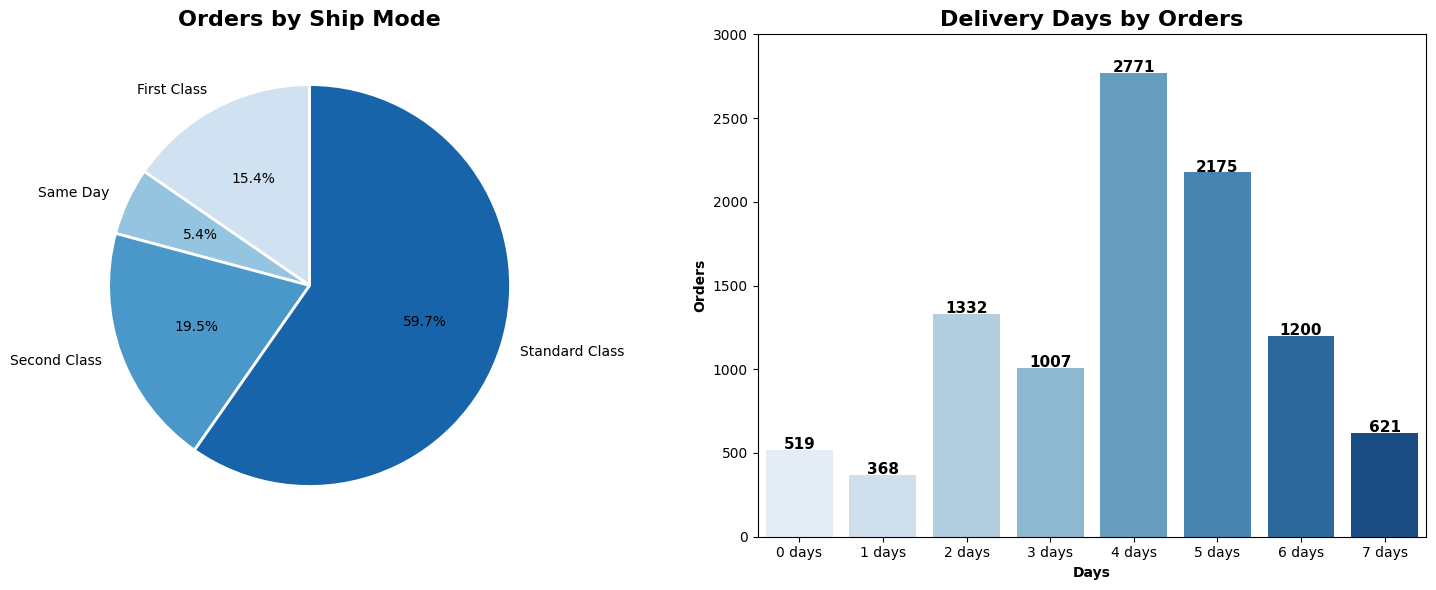

In [324]:
import warnings
warnings.filterwarnings("ignore")

df['Delivery Days'] = df['Ship_Date'] - df['Order_Date']



gb_pie = df.groupby(['Ship_Mode'])['Order_ID'].count().reset_index()
gb_bar = df['Delivery Days'].value_counts().reset_index().sort_values('Delivery Days')
gb_bar.columns = ['Delivery Days', 'count']

fig, axes = plt.subplots(1, 2, figsize=(15,6))

axes[0].pie(
    gb_pie['Order_ID'],
    labels=gb_pie['Ship_Mode'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Blues", len(gb_pie)),
    wedgeprops=dict(edgecolor='white', linewidth=2)
)
axes[0].set_title("Orders by Ship Mode", fontsize=16, fontweight='bold')

sns.barplot(data=gb_bar, x='Delivery Days', y='count', palette='Blues', ax=axes[1])
for i, v in enumerate(gb_bar['count']):
    axes[1].text(i, v + 5, str(v), ha='center', fontweight='bold', fontsize=11)

axes[1].set_title("Delivery Days by Orders", fontsize=16, fontweight='bold')
axes[1].set_xlabel("Days", fontweight='bold')
axes[1].set_ylabel("Orders", fontweight='bold')
axes[1].set_ylim((0, 3000))

plt.tight_layout()
plt.show()
